**Grand X-Ray Slam**: Division B, the second of a 2-part Kaggle hackathon series where data scientists and AI enthusiasts compete to advance medical imaging. In this challenge, you’ll develop AI models to detect 14 thoracic conditions from chest X-rays, tackling real-world clinical complexity. Your work will power Dr HealthAgent by Blue and Gold Healthcare Inc., enhancing global healthcare.

Top performers across both Division B and Division A will also shine on the Grand Slam Leaderboard, sharing an additional $2,500 prize pool.

Name:**Shams Alkhalidy**

# Dataset Description
The Grand X-Ray Slam Division B dataset contains 108,494 chest X-ray images (~139GB) from three major institutions, designed for multi-label classification of 14 thoracic conditions.

This dataset is Part 2 of the ChestDx-MultiInstitution collection. The other half powers Grand X-Ray Slam: Division A.

**Your mission**: build AI models for Dr. HealthAgent to detect thoracic conditions and assist radiologists worldwide.

**Files**

train2.csv – Training labels for ~108,494 images.

train2/ – ~108,494 JPG images (e.g., 000100_001_001.jpg).

test1/ – ~47,927 JPG test images.

**Columns in train2.csv**

- Image_Name – X-ray filename (PatientID_Study_View.jpg).
- Patient_ID – Unique anonymized patient identifier
- Study – Groups X-rays from the same clinical visit.
- Sex – Male / Female (may contain NaNs).
- Age – Patient age (may contain NaNs).
- ViewCategory – Frontal or Lateral.
- ViewPosition – AP / PA / LATERAL.
- 
**14 thoracic conditions (0 = absent, 1 = present):**
- Atelectasis
- Cardiomegaly
- Consolidation
- Edema
- Enlarged Cardiomediastinum
- Fracture
- Lung Lesion
- Lung Opacity
- No Finding
- Pleural Effusion
- Pleural Other
- Pneumonia
- Pneumothorax
- Support Devices
  
**What You’re Predicting: You must detect 14 chest conditions:**

1. Heart issues – Cardiomegaly, Enlarged Cardiomediastinum
2. Lung problems – Pneumonia, Pneumothorax, Lung Opacity
3. Fluid-related – Pleural Effusion, Edema
4. Other – Fracture, Support Devices, No Finding

**Data Provenance**

This dataset is a curated merge of multiple public chest X-ray datasets, fully anonymized and preprocessed to ensure no patient overlap between train and test sets.

**Things to Know**

- Images come from different machines and institutions (style variation).
- Rare conditions (e.g., pneumothorax) → imbalanced labels.
- No patient overlap between train and test.
- Some Sex/Age values missing (NaN).
- Multi-label: one X-ray can show several conditions.

**Tips**

1. Pay attention to rare conditions – they’re the toughest.
2. Conditions often co-occur (e.g., edema + effusion).
3. Medical context matters – don’t treat each label as fully independent.

In [74]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [75]:
import os
print(os.listdir("/kaggle/input"))

# Path to competition dataset
data_dir = "/kaggle/input/grand-xray-slam-division-b"
# Check what files are inside
print('Filenames of the data', os.listdir(data_dir))

['grand-xray-slam-division-b']
Filenames of the data ['test2', 'sample_submission_2.csv', 'train2.csv', 'train2']


# Load Data

 Each row corresponds to one chest X-ray image.

In [76]:
# Load the training CSV metadata with labels
train = pd.read_csv(f"{data_dir}/train2.csv")

print('Metadata shape:',train.shape)
train.head()

Metadata shape: (108494, 21)


,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Map images to metdata
map images of Xray to the metadata of labels

In [77]:
# Add full path to each image (new column:filepath )
train["filepath"] = train["Image_name"].apply(lambda x: os.path.join(data_dir, "train2", x))
train.head()

,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,filepath
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,0,0,1,0,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,0,0,1,0,0,0,0,0,/kaggle/input/grand-xray-slam-division-b/train...


# Dataset Summary

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108494 entries, 0 to 108493
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Image_name                  108494 non-null  object 
 1   Patient_ID                  108494 non-null  int64  
 2   Study                       108494 non-null  int64  
 3   Sex                         93829 non-null   object 
 4   Age                         93829 non-null   float64
 5   ViewCategory                108494 non-null  object 
 6   ViewPosition                108494 non-null  object 
 7   Atelectasis                 108494 non-null  int64  
 8   Cardiomegaly                108494 non-null  int64  
 9   Consolidation               108494 non-null  int64  
 10  Edema                       108494 non-null  int64  
 11  Enlarged Cardiomediastinum  108494 non-null  int64  
 12  Fracture                    108494 non-null  int64  
 13  Lung Lesion   

In [79]:
print(train.isna().sum())  #Missing Values

Image_name                        0
Patient_ID                        0
Study                             0
Sex                           14665
Age                           14665
ViewCategory                      0
ViewPosition                      0
Atelectasis                       0
Cardiomegaly                      0
Consolidation                     0
Edema                             0
Enlarged Cardiomediastinum        0
Fracture                          0
Lung Lesion                       0
Lung Opacity                      0
No Finding                        0
Pleural Effusion                  0
Pleural Other                     0
Pneumonia                         0
Pneumothorax                      0
Support Devices                   0
filepath                          0
dtype: int64


In [80]:
total_images = len(train)
total_patients = train['Patient_ID'].nunique()
total_studies = train['Study'].nunique()
print(f"Total Images: {total_images}")
print(f"Total Patients: {total_patients}")
print(f"Total Studies: {total_studies}")

Total Images: 108494
Total Patients: 32077
Total Studies: 184


# EDA plots

- Demographic Distribution 

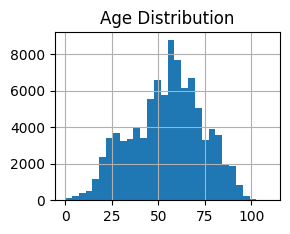

Distribution among train data of: Sex
Male      54504
Female    39325
Name: count, dtype: int64


In [81]:
# Demographic Distribution 
plt.subplot(2, 2, 1)
train['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.show()

print('Distribution among train data of:',train['Sex'].value_counts())  # balanced ratio of 


# Label Prevelance Analysis
Analyze the distribution of the 14 conditions to identify class imbalance

In [82]:
# Class imbalance
label_cols = ['Atelectasis','Cardiomegaly','Consolidation','Edema','Enlarged Cardiomediastinum',
              'Fracture','Lung Lesion','Lung Opacity','No Finding','Pleural Effusion',
              'Pleural Other','Pneumonia','Pneumothorax','Support Devices']
# Calculate counts and percentages for each condition
label_counts = train[label_cols].sum()
label_percentages = (label_counts / total_images * 100).round(2)
prevalence_df = pd.DataFrame({
    'Condition': label_counts.index,
    'Count': label_counts.values,
    'Percent (%)': label_percentages.values
}).sort_values(by='Count', ascending=False)

# Display prevalence table
print("Label Prevalence:")
print(prevalence_df)

Label Prevalence:
                     Condition  Count  Percent (%)
7                 Lung Opacity  49022        45.18
0                  Atelectasis  38613        35.59
4   Enlarged Cardiomediastinum  37566        34.62
13             Support Devices  37385        34.46
1                 Cardiomegaly  34980        32.24
9             Pleural Effusion  34569        31.86
8                   No Finding  34365        31.67
2                Consolidation  29644        27.32
3                        Edema  26567        24.49
5                     Fracture  14578        13.44
11                   Pneumonia  14316        13.20
6                  Lung Lesion  12357        11.39
12                Pneumothorax   8738         8.05
10               Pleural Other   6931         6.39


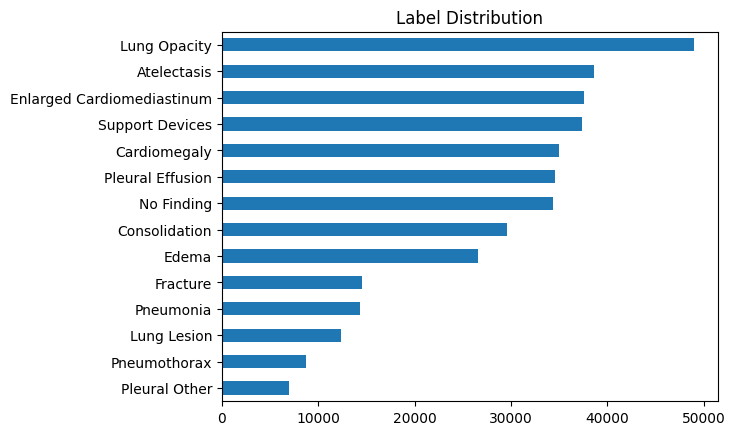

In [83]:
train[label_cols].sum().sort_values().plot(kind="barh")
plt.title('Label Distribution')
plt.show()
# Pleural Other seems pretty rare and Lung Opacity is common among patients

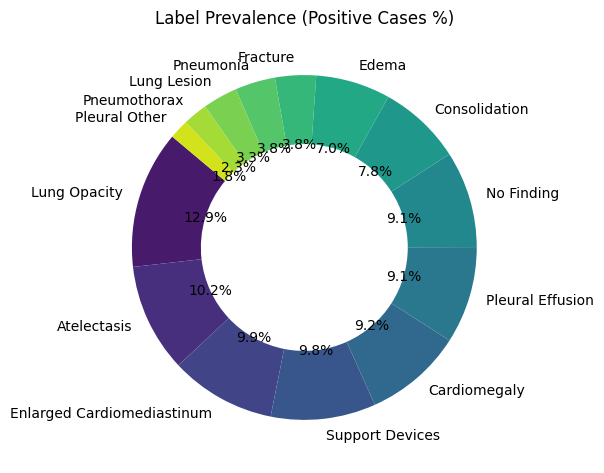

In [84]:
# Donut chart for label percentages
plt.figure(figsize=(6, 6))
colors = sns.color_palette('viridis', len(prevalence_df)) #Generates a list of colors using the viridis colormap from Seaborn.

# prevalence_df['Count'] = number of positive cases per condition
plt.pie(prevalence_df['Count'], labels=prevalence_df['Condition'],
        autopct=lambda pct: f'{pct:.1f}%', startangle=140, colors=colors,
        wedgeprops={'width': 0.4})

plt.title('Label Prevalence (Positive Cases %)')
plt.tight_layout()
plt.savefig('/content/label_percent_donut.jpg')
plt.show()

# Multi-Label Pattens
Examine number of conditions that occur per Xray Image

In [85]:
# train.head()

In [86]:
# calculate number of labels per image
train['label_count'] = train[label_cols].sum(axis=1)      # axis=1 to sum accross columns
multi_labelcount= train['label_count'].value_counts().sort_index()
multi_label_perc = (multi_labelcount/total_images *100).round(2)

# Display mult-label distribution
print('Multi-label distribution')
print(pd.DataFrame({
                    "Number of Labels": multi_labelcount.index,
                    "Count": multi_labelcount.values,
                    "Percentage": multi_label_perc.values
}))


Multi-label distribution
    Number of Labels  Count  Percentage
0                  1  52859       48.72
1                  2   9305        8.58
2                  3   5912        5.45
3                  4   4685        4.32
4                  5   4028        3.71
5                  6   3907        3.60
6                  7   6905        6.36
7                  8  12765       11.77
8                  9   4529        4.17
9                 10   2797        2.58
10                11    706        0.65
11                12     96        0.09


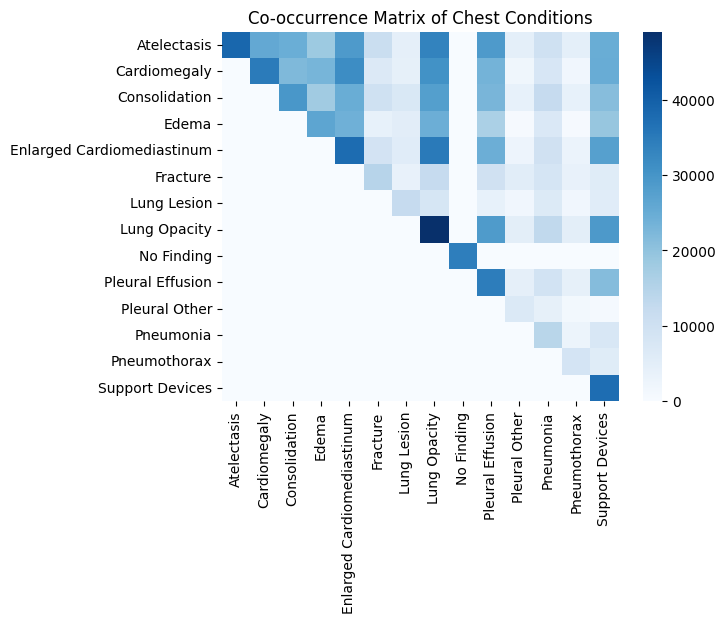

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
Atelectasis,38613.0,25844.0,24663.0,18394.0,28796.0,11174.0,4508.0,33494.0,0.0,28820.0,4636.0,10081.0,4710.0,24740.0
Cardiomegaly,0.0,34980.0,22133.0,23123.0,31522.0,6817.0,4224.0,30462.0,0.0,23522.0,1984.0,7961.0,1807.0,24988.0
Consolidation,0.0,0.0,29644.0,17966.0,24748.0,10031.0,7323.0,27842.0,0.0,22810.0,4007.0,12368.0,4016.0,21104.0
Edema,0.0,0.0,0.0,26567.0,24043.0,3904.0,5355.0,24500.0,0.0,16374.0,634.0,7121.0,724.0,19231.0
Enlarged Cardiomediastinum,0.0,0.0,0.0,0.0,37566.0,9169.0,5576.0,35132.0,0.0,24451.0,2679.0,9814.0,2984.0,27732.0
Fracture,0.0,0.0,0.0,0.0,0.0,14578.0,3648.0,12428.0,0.0,9913.0,5527.0,8512.0,3711.0,5820.0
Lung Lesion,0.0,0.0,0.0,0.0,0.0,0.0,12357.0,8230.0,0.0,3854.0,1822.0,6539.0,1913.0,5600.0
Lung Opacity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49022.0,0.0,28619.0,5069.0,13109.0,5141.0,28961.0
No Finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34365.0,0.0,0.0,0.0,0.0,0.0
Pleural Effusion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34569.0,4591.0,9253.0,4231.0,21275.0


In [87]:
# Co-occurrence matrix → which labels tend to appear together.
# Initialize empty matrix
co_matrix = np.zeros((len(label_cols), len(label_cols)))

# Fill it
for i, col1 in enumerate(label_cols):
    for j, col2 in enumerate(label_cols):
        if i <= j:  # fill upper triangle (matrix is symmetric)
            co_matrix[i, j] = ((train[col1] == 1) & (train[col2] == 1)).sum()

# Convert to DataFrame for nicer display
co_matrix_df = pd.DataFrame(co_matrix, index=label_cols, columns=label_cols)

sns.heatmap(co_matrix_df, annot=False, cmap="Blues")
plt.title("Co-occurrence Matrix of Chest Conditions")
plt.show()
co_matrix_df

           Type  Count
0  Single Label  52859
1   Multi-Label  55635


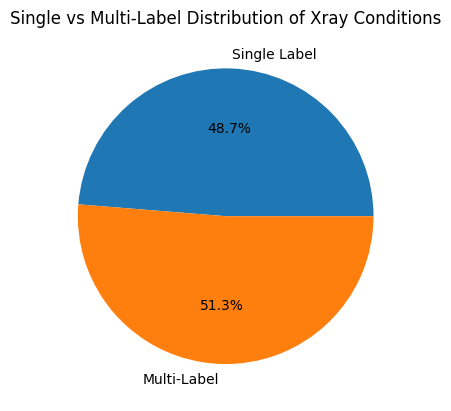

In [88]:
# Visualizing Single label vs Multi-label distribution among X-ray Training data
single_label_count = (train['label_count']==1).sum()
multi_label_count = (train['label_count']>1).sum()

# put into a dataframe
label_dist= pd.DataFrame({'Type':['Single Label','Multi-Label'],
                               'Count': [single_label_count,multi_label_count]})
print(label_dist)

plt.pie(label_dist['Count'], labels = label_dist['Type'], autopct="%1.1f%%")
plt.title('Single vs Multi-Label Distribution of Xray Conditions')
plt.show()

           Type  Count
0  Single Label  18494
1   Multi-Label  55635


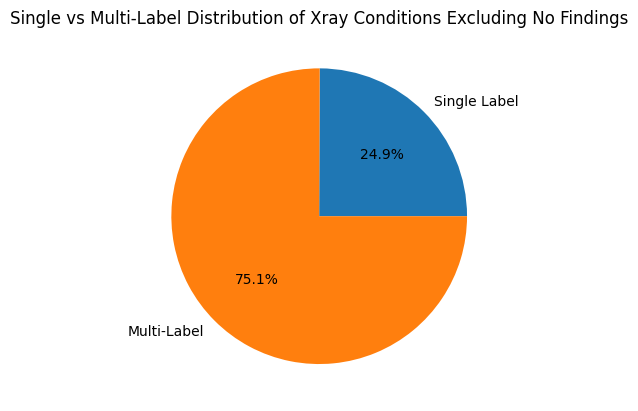

In [91]:
# Display Multi-label Patterns excluding the No Findings Xray conditions
filtered_df = train[(train['label_count'] >=1) & (train['No Finding'] == 0)]

single_label_count = (filtered_df['label_count']==1).sum()
multi_label_count = (filtered_df['label_count']>1).sum()

# put into a dataframe
label_dist= pd.DataFrame({'Type':['Single Label','Multi-Label'],
                               'Count': [single_label_count,multi_label_count]})
print(label_dist)

plt.pie(label_dist['Count'], labels = label_dist['Type'], autopct="%1.1f%%")
plt.title('Single vs Multi-Label Distribution of Xray Conditions Excluding No Findings')
plt.show()